### Wstęp

Zbiór danych pochodzi z artykułu dostępnego pod adresem [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010), zawierającego dane wyekstrahowane z baz SQL systemów zarządzania nieruchomościami (PMS) hoteli. Autorami są Nuno Antonio, Ana de Almeida oraz Luis Nunes.

Dane stanowią połączenie dwóch zbiorów:
  - H1 – dane hotelu wypoczynkowego, obejmujące 40 060 obserwacji.
  - H2 – dane hotelu miejskiego, obejmujące 79 330 obserwacji.
  
Oba zbiory mają identyczną strukturę, zawierając 31 zmiennych opisujących każdą rezerwację. Dane dotyczą rezerwacji osób, które miały przybyć w okresie od 1 lipca 2015 do 31 sierpnia 2017, w tym zarówno rezerwacji zakończonych przybyciem, jak i odwołanych.

Celem analizy jest:

1. Identyfikacja zmiennych mających istotny wpływ na decyzję gości o anulowaniu rezerwacji.
2. Opracowanie modeli klasyfikacyjnych pozwalających na predykcję prawdopodobieństwa anulowania rezerwacji.



Opis cech występujących w zbiorze:
| Zmienna                       | Typ       | Opis                                                                                      |
|-------------------------------|-----------|-------------------------------------------------------------------------------------------|
| hotel                         | character | Hotel (Resort Hotel = Hotel wypoczynkowy lub City Hotel = Hotel miejski)                                         |
| is_canceled                   | double    | Wartość wskazująca, czy rezerwacja została anulowana (1), czy nie (0)                    |
| lead_time                     | double    | Liczba dni od wprowadzenia rezerwacji do systemu PMS do daty przyjazdu                   |
| arrival_date_year             | double    | Rok daty przyjazdu                                                                       |
| arrival_date_month            | character | Miesiąc daty przyjazdu                                                                   |
| arrival_date_week_number      | double    | Numer tygodnia roku, w którym wypada data przyjazdu                                    |
| arrival_date_day_of_month     | double    | Dzień miesiąca, w którym wypada data przyjazdu                                         |
| stays_in_weekend_nights       | double    | Liczba noclegów w weekend (sobota / niedziela)                                         |
| stays_in_week_nights          | double    | Liczba noclegów w dni robocze (poniedziałek-piątek)                                      |
| adults                        | double    | Liczba osób dorosłych                                                                    |
| children                      | double    | Liczba dzieci                                                                            |
| babies                        | double    | Liczba niemowląt                                                                         |
| meal                          | character | Rodzaj wykupionego wyżywienia: Undefined/SC (brak), BB (nocleg i śniadanie), HB (śniadanie i jeden dodatkowy posiłek), FB (pełne wyżywienie: śniadanie, obiad i kolacja)     |
| country                       | character | Kraj pochodzenia gościa w formacie ISO 3155-3:2013                                       |
| market_segment                | character | Segment marketu: Online/Offline TA/TO ( rezerwacja przez internet/na żywo za pośrednictwem biur podróży/touroperatorów), Direct (bezpośrednio w hotelu), Corporate (rezerwacja przez firmę), Groups (rezerwacje grupowe), Complementary (rezerwacje darmowe lub sponsorowane), Aviation (rezerwacje dokonywane przez linie lotnicze dla załóg)                               |
| distribution_channel          | character | Kanał dystrybucji (jak klient dokonał rezerwacji): TA/TO (rezerwacje dokonane przez biura podróży), Direct (rezerwacje dokonane bezpośrednio w hotelu), Corporate (rezerwacje dokonane przez firmy), GDS (rezerwacje dokonane przez globalne systemy dystrybucji)                          |
| is_repeated_guest             | double    | Czy gość jest powracający (1), czy nie (0)                                               |
| previous_cancellations        | double    | Liczba anulowanych rezerwacji przed obecną                                               |
| previous_bookings_not_canceled| double    | Liczba rezerwacji, które nie zostały anulowane przed obecną                              |
| reserved_room_type            | character | Standard/rodzaj pokoju zarezerwowanego                                                      |
| assigned_room_type            | character | Standard/rodzaj pokoju przydzielonego                                                       |
| booking_changes               | double    | Liczba zmian wprowadzonych do rezerwacji                                                |
| deposit_type                  | character | Typ zaliczki: No Deposit (brak), Non Refund (bezzwrotna), Refundable (zwrotna)          |
| agent                         | character | ID biura podróży                                                                         |
| company                       | character | ID firmy/podmiotu opłacającego rezerwację                                                |
| days_in_waiting_list          | double    | Liczba dni na liście oczekujących                                                        |
| customer_type                 | character | Typ rezerwacji: Contract (rezerwacje związane z umowami biznesowymi), Group (rezerwacje grupowe dla dużej liczby osób), Transient (rezerwacje indywidualne na krótki pobyt), Transient-party (rezerwacje krótkoterminowe dla małych grup)                             |
| adr                           | double    | Średnia dzienna stawka za pokój (ADR)                                                            |
| required_car_parking_spaces   | double    | Liczba wymaganych miejsc parkingowych                                                   |
| total_of_special_requests     | double    | Liczba specjalnych życzeń                                                                |
| reservation_status            | character | Ostatni status rezerwacji: Canceled(rezerwacja została anulowana przez klienta), Check-Out (klient zameldował się, ale już wyjechał), No-Show (klient nie zameldował się i nie poinformował hotelu o powodzie)                                 |
| reservation_status_date       | double    | Data ustawienia ostatniego statusu rezerwacji (anulowanie rezerwacji lub wymeldowanie się)                                           |


### Wczytanie bibliotek i danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import normalize

In [2]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

dane_eda = dane.copy()

In [3]:
print(f'Liczba obserwacji w naszym zbiorze danych wynosi {dane.shape[0]}, a liczba kolumn to {dane.shape[1]}')

Liczba obserwacji w naszym zbiorze danych wynosi 119390, a liczba kolumn to 32


In [4]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Już na wstępnym etapie analizy danych można dostrzec kilka interesujących obserwacji. Widać, że w naszym zbiorze brakuje wartości w kilku kolumnach: `children`, `country`, `agent` oraz `company`, przy czym dwie ostatnie zawierają szczególnie dużo braków. Kolejną istotną kwestią jest typ zmiennej `children`, który został określony jako `float64`. Fakt, że zmienna `children` została wczytana jako `float64`, mimo że w rzeczywistości powinna być zmienną całkowitą, wynika najprawdopodobniej z obecności brakujących danych. Później po usunięciu braków danych zamienimy typ kolumny na `int64`.

In [5]:
dane.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


W szczegóły dotyczące konkretnych kolumn wejdziemy później, jednak warto zwrócić uwagę na wartości maksymalne, które mocno odbiegają od kwartyli. Takie wartości mogą stanowić potencjalne outliery, które mogą znacząco wpłynąć na wyniki analizy lub modelowanie danych. Przykłady takich kolumn to `lead_time`, `adr` czy `stays_in_week_nights`, gdzie wartości maksymalne są znacznie wyższe niż typowe wartości w rozkładzie. Zwrócimy na to uwagę w przyszłości.

### EDA

In [6]:
dane.drop(columns = ['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number'], inplace = True)

### Obsługa brakujących danych

Jak już wcześniej zauważyliśmy, w zbiorze danych występują brakujące wartości w kilku kolumnach, takich jak `children`, `country`, `agent` oraz `company`. Ponieważ niektóre algorytmy uczenia maszynowego nie radzą sobie z brakami danych, musimy podjąć odpowiednie kroki, aby się ich pozbyć. W tym celu rozważymy metody imputacji brakujących danych lub, w razie potrzeby, usuniemy wiersze zawierające braki, a nawet usuniemy kolumny jeśli zawierają naprawdę dużo braków.

Dodatkowo, zwróćmy uwagę na kolumny, które zawierają braki, aby przypisać im odpowiednie typy danych. Na przykład, kolumna children powinna mieć typ `int64`, ponieważ nie powinno być wartości zmiennoprzecinkowych w przypadku liczby dzieci.

Zaczniemy od sprawdzenia ile mamy braków danych.

In [7]:
dane.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

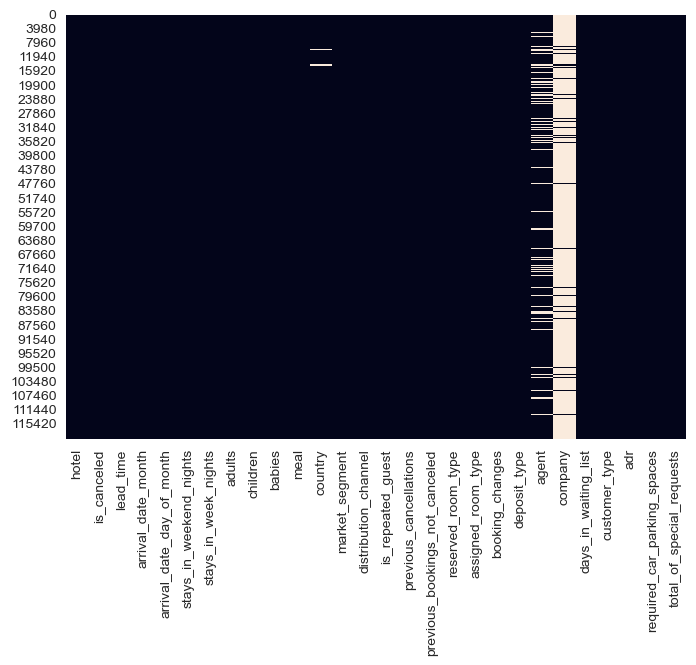

In [8]:
sns.heatmap(dane.isna(), cbar = False)
plt.show()

Widzimy, że w danych występują braki w kilku kolumnach. Największe braki dotyczą kolumny `company` (112593) potem `agent` (16340) oraz `country` (488). Kolumna `children` ma tylko 4 brakujące wartości.

Najpierw usuniemy wiersze z brakującymi danymi dla kolumny `children`. Jest ich tylko 4, więc nie ma co sobie nimi zawracać głowy. Dodatkwo ustawiamy poprawny typ zmiennej.

In [9]:
dane.dropna(subset = ['children'], inplace = True)
dane['children'] = dane['children'].astype('int64')

Podobnie postąpimy w przypadku `country`, ponieważ wciąż mamy do czynienia z niewielką ilością wierszy w porównaniu do całego zbioru.

In [10]:
dane.dropna(subset = ['country'], inplace = True)
dane['country'] = dane['country'].astype('object')

W przypadku brakujących danych w pozostałych kolumnach wstawimy wartość `None`, ponieważ `NaN` w tych kolumnach oznaczałby, że gość nie korzystał z usług agenta lub nie był wysłany z firmy. Dodatkowo, zmienimy typ tych kolumn na object, ponieważ wartości te nie mają sensu numerycznego.

In [11]:
dane.fillna({'agent': 'None', 'company': 'None'}, inplace = True)
dane[['agent', 'company']] = dane[['agent', 'company']].astype('object')

In [12]:
dane.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

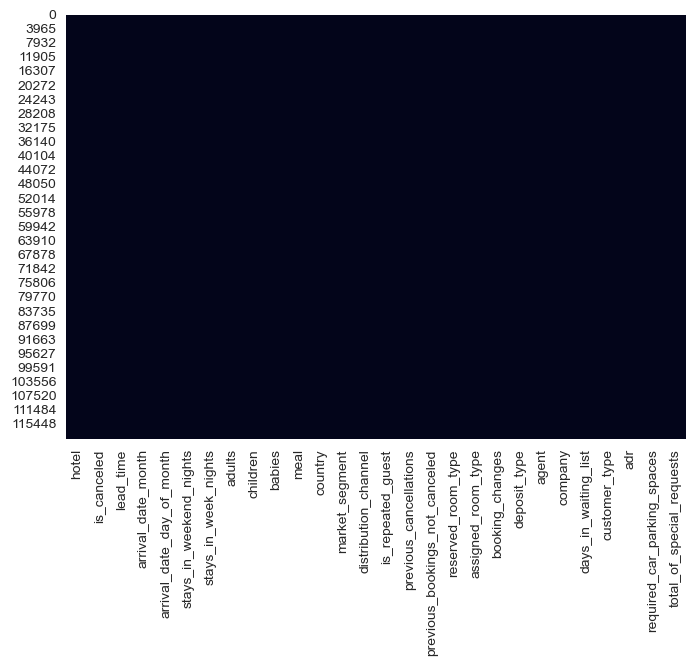

In [13]:
sns.heatmap(dane.isna(), cbar = False)
plt.show()

Zanim przejdziemy dalej zapiszemy jeszcze zbiór bez braków danych.

In [14]:
dane.to_csv('df_bez_brakow.csv')

### Wstępne szkolenie modeli

Teraz przeprowadzimy wstępne szkolenie modeli przy użyciu biblioteki `pycaret`. Naszym celem jest porównanie wielu modeli na nieobrobionych danych i wybranie tych, które wydają się lepsze dla naszego problemu. Jesteśmy świadomi, że część modeli poradzi sobie gorzej z powodu tego, że brakuje kroków wymaganych do ich najpoprawniejszego szkolenia (a nawet poprawnego), jednak w tym momencie interesuje nas tylko jak modele poradzą sobie na podstawowych niezmienionych danych.

In [15]:
s1 = setup(data = dane, target = 'is_canceled', session_id = 123, use_gpu = True, n_jobs = -1)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(118898, 28)"
4,Transformed data shape,"(118898, 78)"
5,Transformed train set shape,"(83228, 78)"
6,Transformed test set shape,"(35670, 78)"
7,Numeric features,15
8,Categorical features,12
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

Rezygnuujemy  z `Accuracy` i wybieramy optymalizacje modelu po metryce `Precision`, ponieważ zależy nam bardziej na tym, aby nasz model poprawnie wykrywał rezerwacje odwołane przez gości.

In [16]:
compare_models(sort = 'Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8890,0.0000,0.8090,0.8823,0.8440,0.7581,0.7599,5.1950
et,Extra Trees Classifier,0.8837,0.0000,0.8030,0.8736,0.8368,0.7467,0.7483,11.6050
lightgbm,Light Gradient Boosting Machine,0.8709,0.0000,0.7935,0.8489,0.8203,0.7197,0.7207,2.6190
gbc,Gradient Boosting Classifier,0.8526,0.9295,0.7596,0.8291,0.7928,0.6787,0.6803,33.0820
ridge,Ridge Classifier,0.8068,0.8926,0.6047,0.8288,0.6992,0.5619,0.5771,3.0250
lda,Linear Discriminant Analysis,0.8075,0.8926,0.6104,0.8257,0.7019,0.5644,0.5785,9.5650
ada,Ada Boost Classifier,0.8321,0.9125,0.7063,0.8168,0.7576,0.6302,0.6341,7.2620
lr,Logistic Regression,0.8214,0.8993,0.6819,0.8073,0.7392,0.6049,0.6099,15.6310
svm,SVM - Linear Kernel,0.7791,0.8793,0.6254,0.7934,0.6686,0.5110,0.5439,13.6290
dt,Decision Tree Classifier,0.8459,0.0000,0.7982,0.7892,0.7937,0.6707,0.6707,3.2510


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Najlepiej z zadaniem klasyfikacji radzą sobie modele oparte na drzewach decyzyjnych oraz modele działające na złożeniach słabszych mdoeli tzw. ensemble learning. Wiadomo, że przyczyną może być brak poważnego preprocessingu koniecznego dla takich modeli jak SVM czy KNN, jednak w kolejnych etapach szkolenia w przyszłości skupimy się głównie na modelach opartych na drzewach.

In [19]:
for col in dane.select_dtypes(include = ['int64', 'float64']):
    print(dane[col].value_counts())

is_canceled
0    74745
1    44153
Name: count, dtype: int64
lead_time
0      6223
1      3393
2      2033
3      1802
4      1696
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64
arrival_date_day_of_month
17    4390
5     4294
15    4161
25    4144
26    4137
9     4082
12    4077
16    4058
19    4041
2     4037
20    4019
18    3986
24    3980
28    3927
8     3908
30    3833
3     3833
6     3813
14    3799
27    3787
21    3754
4     3747
13    3723
7     3657
1     3609
23    3608
11    3590
22    3584
29    3567
10    3554
31    2199
Name: count, dtype: int64
stays_in_weekend_nights
0     51680
2     33249
1     30526
4      1849
3      1253
6       153
5        78
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
Name: count, dtype: int64
stays_in_week_nights
2     33574
1     30091
3     22203
5     11051
4      9554
0      7593
6      1491
10     1030
7      1027
8      